# Abstract

In this report, I provide an assessment of the prediction of early detection of hepatocellular carcinoma using serum α-fetoprotein (AFP) and abdominal ultrasound (US). These data were published by WC Kao et. al and 2001 [1]. In general, prediction and prediction accuracy depend on several features. These include prevalence, sensitivity and specificity. Here I focus on patient prevalence and positive predictive value (PPV), which by definition provides a good metric to evaluate true and false positive ratios. Potential problems with prevalence and high false positive (FP) rates were identified during the analysis.            

# Background

The objective of published paper [1] were measure the ability of US and AFP to detect HCC over 7 years period in 602 patients with chronic viral hepatits. During the study, the prevalence of HCC detected with US and AFP was 5% (31 of 602 patients). Over 7 years, the researchers collect 2552 serum AFP – 4.2 tests per patient and 1388 US examinations – 2.3 per patient. In the study, researchers divided AFP measurements based on ng/ml concentration to 7 groups. Researchers tested predicting power of US (as one measurment) and the measurement of AFP levels. They test 7 AFP concetration (ng/mL) thresholds:
1. AFP ≥ 8
2. AFP ≥ 11
3. AFP ≥ 13
4. AFP ≥ 16
5. AFP ≥ 19
6. AFP ≥ 21
7. AFP ≥ 24

AFP levels were normalized. Ratio of 1 = indicate normal levels. Values higher than 1 indicates AFP level higher than normal.

# Research questions

In the presented report, I focus on the evaluation of true positive (TP) and FP metrics, during the prediction of HCC using AFP and US, together in the context of patient prevalence. These relationships were discovered by answering the following questions:
1. What are the TP, FP, true negative (TN), and false negative (FN) values of the original data?
2. What are the PPV ratios of the original data?
3. Is number of patients enough to get stable number of TP and FP values?
4. How PPV change with change of patient prevalence?
5. Have higher levels of AFP concentrations a better ability to obtain a higher TP value?

# Hypothesis and potential source of deficiencies

As a main result of published paper we can consider following table.
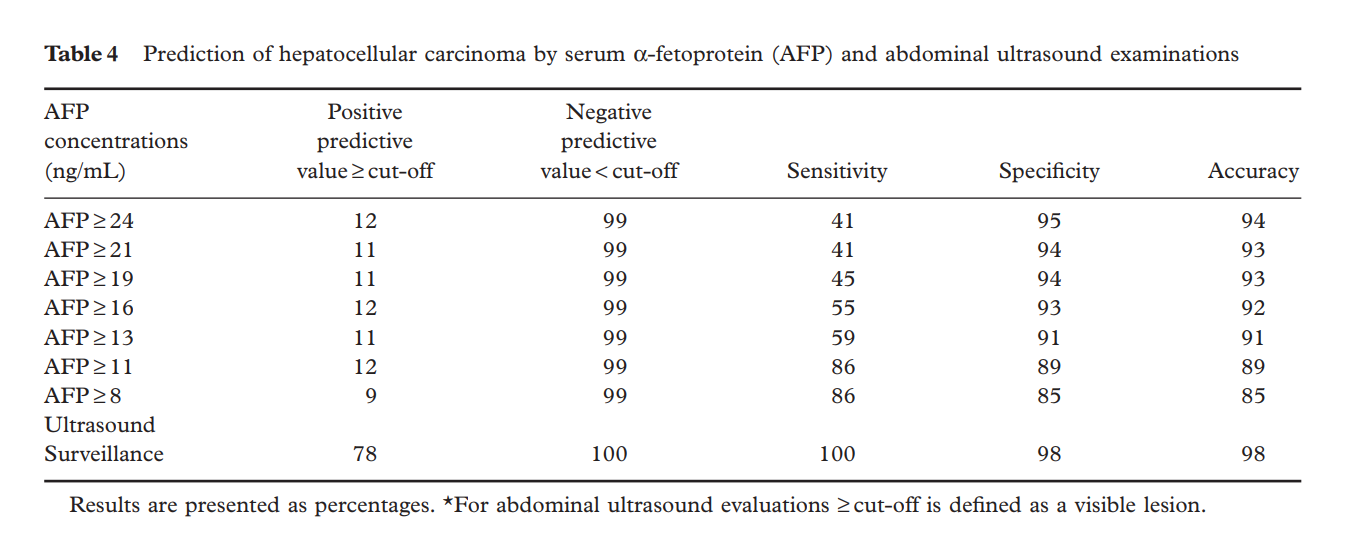
The researchers show us a table where they rate the prediction of HCC with US and different AFP concentration thresholds. However, they do not evaluate TP, TF or FP and FN values in the context of prevalence (just as positive and negative predicting threshold). With a prevalence as low as 5%, these numbers, especially FP, can be problematic. This is because there are large differences between the number of TP and FP values, e.g. 5% prevalence means 5 positive samples in 100 sample population. Adding just 5 more FP hits increases the original true value by 100%. 

My hypothesis is: There is a potentially problematic high value of FP values which will decrease with population size or bigger prevalence. These, I evaluate via PPV ratio. PPV is the probability that a specific event occurred when a test result is positive.

# Results and analysis

In [2]:
########################################################################################################################################################
# import libraries
########################################################################################################################################################

from matplotlib import pyplot as plt
import matplotlib as mpl

import pandas as pd
import numpy as np
import random, math

In [3]:
########################################################################################################################################################
# Generate population with defined prevalence (as True - disease or False - healthy)
########################################################################################################################################################

# generator of patient population with defined prevalence
def pop_prev(population: int, prevalence: float):
    k = round((population / 100) * prevalence)
    j = population - k
    random_list = [False] * int(j) + [True] * int(k)
    random_list2 = np.array(random_list)
    
    return random_list2

# population and prevalence from the published paper
patient_population = 602
prevalence_percent = 5

# generate of population
pop_real = pop_prev(patient_population, prevalence_percent)
pop_real.sum()

30

The results rounded to 5% prevalence have a final number of 30 positive results, not 31 as in the study. Researchers should add digits to 5% - to make it more accurate. Standard can be 5.XX%

In [4]:
########################################################################################################################################################
# To get general overview, I use and modify jupyter code by Gavin Chaint.
########################################################################################################################################################

# function for calulating prediction statistics
def get_universal_test_results(sample: int, sensitivity: float, specificity: float):
    response = np.where(sample,
                        # If actually true, the probability that the test returns true
                        sample * (np.random.random_sample((len(sample), )) < sensitivity),
                        # If actually false, the probability that the test returns false
                        ~sample * (np.random.random_sample((len(sample), )) > specificity))
    s = len(sample) # sample size
    tr = len(response[response==True]) # true test response
    fr = s - tr # false test response
    ap = len(sample[sample==True]) # actual positive
    an = s - ap # actual negative
    tp = len(sample[(sample == response) & (sample == True)]) # true positive of response
    tn = len(sample[(sample == response) & (sample == False)]) # true negative of response
    fn = ap - tp # false negative of response
    fp = an - tn # false positive of response
    # https://en.wikipedia.org/wiki/Sensitivity_and_specificity#Prevalence_Threshold
    if sensitivity + specificity == 1:
        prevalence_threshold = 0.5
    else:
        prevalence_threshold = ((math.sqrt(sensitivity*(-specificity + 1)) - 1 + specificity)/
                                (sensitivity + specificity - 1))
        print("Universal Test Results")
    print("----------------------")
    print(F"{tr:,} positive test results for sample (n = {s:,}), with {ap/s*100:.1f}% sample prevalence.")
    print("----------------------")
    # '\t' is the special 'tab' character
    print(F"Actual positive  = {ap:,}  \t|\t Actual negative  = {an:,}")
    print(F"True positive  = {tp:,}   \t|\t True negative  = {tn:,}")
    print(F"False positive = {fp:,}  \t|\t False negative = {fn:,}")
    print("----------------------")
    print(F"Positive predictive value (PPV) = {tp/(tp+fp)*100:.1f}%")
    print(F"Prevalence threshold = {prevalence_threshold*100:.1f}% \t|\t Actual prevalence = {ap/s*100:.1f}%")
    print(F"Accuracy = {(tp+tn)/s*100:.1f}%")
    
    return 

In [5]:
########################################################################################################################################################
# Testing predictive metrics for abdominal ultrasound examinations
########################################################################################################################################################

# Ultrasound Surveillance sensitivity and specificity - Tab. 4 in paper
sensitivity = 1
specificity = 0.98

# apply function
US =  get_universal_test_results(pop_real, sensitivity, specificity)

Universal Test Results
----------------------
45 positive test results for sample (n = 602), with 5.0% sample prevalence.
----------------------
Actual positive  = 30  	|	 Actual negative  = 572
True positive  = 30   	|	 True negative  = 557
False positive = 15  	|	 False negative = 0
----------------------
Positive predictive value (PPV) = 66.7%
Prevalence threshold = 12.4% 	|	 Actual prevalence = 5.0%
Accuracy = 97.5%


In [6]:
########################################################################################################################################################
# Test prediction metrics for AFP

# Note: Sensitivity and specificity for corresponding AFP threshold levels are ordered left to right. From AFP ≥ 8 (left tail) to AFP ≥ 24 (right tail) 
########################################################################################################################################################

# AFP, different threshold (see note) - Tab. 4 in paper
sensitivity = [0.86, 0.86, 0.59, 0.55, 0.45, 0.41, 0.41]
specificity = [0.85, 0.89, 0.91, 0.93, 0.94, 0.94, 0.95]

# apply function
for f, b in zip(sensitivity, specificity):
    g = get_universal_test_results(pop_real, f, b)

Universal Test Results
----------------------
125 positive test results for sample (n = 602), with 5.0% sample prevalence.
----------------------
Actual positive  = 30  	|	 Actual negative  = 572
True positive  = 27   	|	 True negative  = 474
False positive = 98  	|	 False negative = 3
----------------------
Positive predictive value (PPV) = 21.6%
Prevalence threshold = 29.5% 	|	 Actual prevalence = 5.0%
Accuracy = 83.2%
Universal Test Results
----------------------
83 positive test results for sample (n = 602), with 5.0% sample prevalence.
----------------------
Actual positive  = 30  	|	 Actual negative  = 572
True positive  = 26   	|	 True negative  = 515
False positive = 57  	|	 False negative = 4
----------------------
Positive predictive value (PPV) = 31.3%
Prevalence threshold = 26.3% 	|	 Actual prevalence = 5.0%
Accuracy = 89.9%
Universal Test Results
----------------------
77 positive test results for sample (n = 602), with 5.0% sample prevalence.
----------------------
Actual

For US the PPV ratio is 68.2%.
For AFP there are different values of TP, FP or TN and FN as well as different PPV ratios. All predictions of HCC via AFP follow same issue. In all of them there are big FP values compare to TP values, with following relativerly low PPV ratio. That's why in next analysis I will closer look how FP, FN and PPV change in different AFP thresholds.

In [7]:
########################################################################################################################################################
# function for test FP,FN and PPV for different AFP concentration thresholds

# Note: modified function of metric test function
########################################################################################################################################################

def get_universal_test_results(sample: int, sensitivity: float, specificity: float):
    response = np.where(sample,
                        # If actually true, the probability that the test returns true
                        sample * (np.random.random_sample((len(sample), )) < sensitivity),
                        # If actually false, the probability that the test returns false
                        ~sample * (np.random.random_sample((len(sample), )) > specificity))
    s = len(sample) # sample size
    tr = len(response[response==True]) # true test response
    fr = s - tr # false test response
    ap = len(sample[sample==True]) # actual positive
    an = s - ap # actual negative
    tp = len(sample[(sample == response) & (sample == True)]) # true positive of response
    tn = len(sample[(sample == response) & (sample == False)]) # true negative of response
    fn = ap - tp # false negative of response
    fp = an - tn # false positive of response
    PPV = round(tp/(tp+fp)*100, 1)
    # https://en.wikipedia.org/wiki/Sensitivity_and_specificity#Prevalence_Threshold
    if sensitivity + specificity == 1:
        prevalence_threshold = 0.5
    else:
        prevalence_threshold = ((math.sqrt(sensitivity*(-specificity + 1)) - 1 + specificity)/
                                (sensitivity + specificity - 1))
    return fn, fp, PPV

In [8]:
########################################################################################################################################################
# calculating FP,FN and PPV for different AFP levels
########################################################################################################################################################

fal_n = []
fal_p = []
PPV = []
for f, b in zip(sensitivity, specificity):
    fn, fp, ppv = get_universal_test_results(pop_real, f, b)
    fal_n.append(fn)
    fal_p.append(fp)
    PPV.append(ppv)

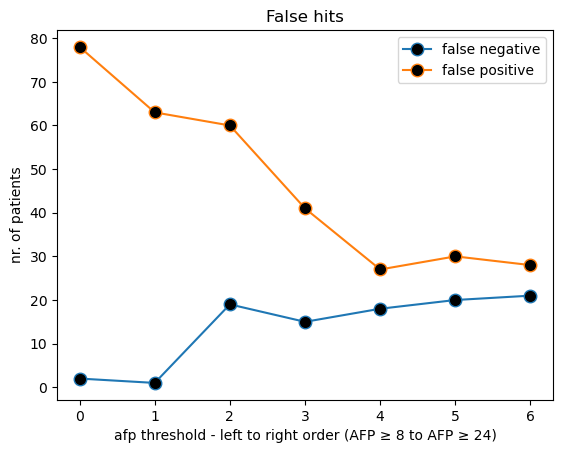

In [9]:
########################################################################################################################################################
# calculating FP (orange) and FN (blue) and for different AFP levels
########################################################################################################################################################

plt.plot(fal_n, label = "false negative", marker='o', markersize=9, markerfacecolor = 'black')
plt.plot(fal_p, label = "false positive", marker='o', markersize=9, markerfacecolor = 'black')
plt.title('False hits')
plt.xlabel('afp threshold - left to right order (AFP ≥ 8 to AFP ≥ 24)')
plt.ylabel('nr. of patients')
plt.legend()
plt.show()

As you can see on the figure, number of false positive detected patients decrease with increasing threshold concentration. On the other hand, patients which where examined as false negative increase with higher AFP threshold.

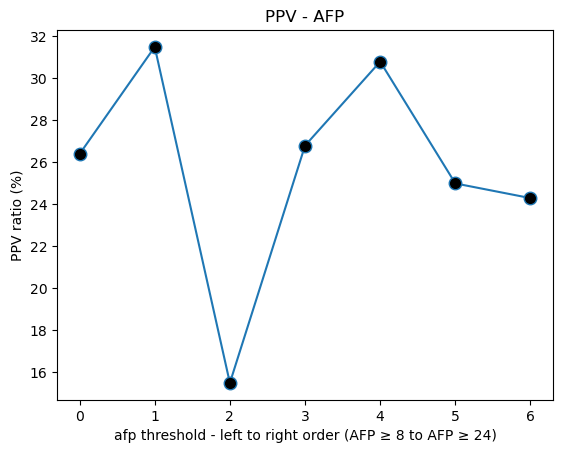

In [10]:
########################################################################################################################################################
# calculating PPV for different AFP levels
########################################################################################################################################################

plt.plot(PPV, marker='o', markersize=9, markerfacecolor = 'black')
plt.title('PPV - AFP')
plt.xlabel('afp threshold - left to right order (AFP ≥ 8 to AFP ≥ 24)')
plt.ylabel('PPV ratio (%)')
plt.show()

PPV for AFP is not monotonic function - there is no trend. By definition of PPV, this analysis provide evidence the ration of TP and FP fluctuate in not predictable way. The problem can be relativelly small sample size. Thats why in next analysis I examined effect of different population size to PPV ration.

### different population size

In [11]:
########################################################################################################################################################
# genering population of 100, 1000, 10000 and 100000 people and prevalence of 5%
########################################################################################################################################################

patient_popul = [100, 1000, 10000, 100000]

pop_list = []
for i in patient_popul:
    pop = pop_prev(i, prevalence_percent)
    pop_list.append(pop)

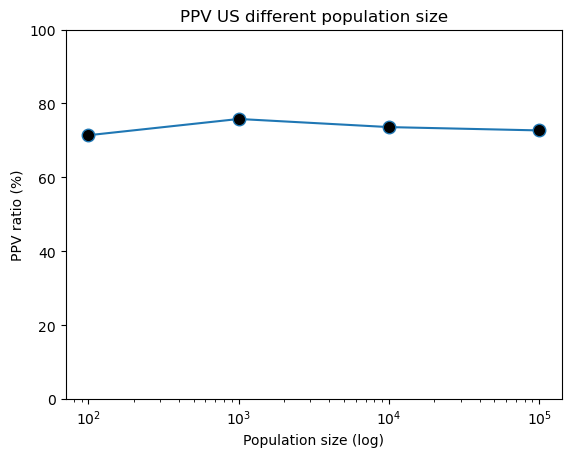

In [12]:
########################################################################################################################################################
# test how PPV change for US for different population size and stable prevalence (5%)
########################################################################################################################################################

# Ultrasound Surveillance - Tab. 4 in paper
sensitivity = 1
specificity = 0.98

# PPV for different sample size
US_pop_PPV = []
for i in pop_list:
        fn, fp, PPV = get_universal_test_results(i, sensitivity, specificity)
        US_pop_PPV.append(PPV)
        
# plot PPV
plt.plot(patient_popul, US_pop_PPV,marker='o', markersize=9, markerfacecolor = 'black')
plt.title('PPV US different population size')
plt.xlabel('Population size (log)')
plt.ylabel('PPV ratio (%)')
plt.xscale('log')
plt.ylim([0, 100])
plt.show()

The US PPV does not change with different sample sizes, it is stable, and the original sample size of 603 people can be considered sufficient for the analysis of the TP/FP ratio in the prediction of HCC in the US.

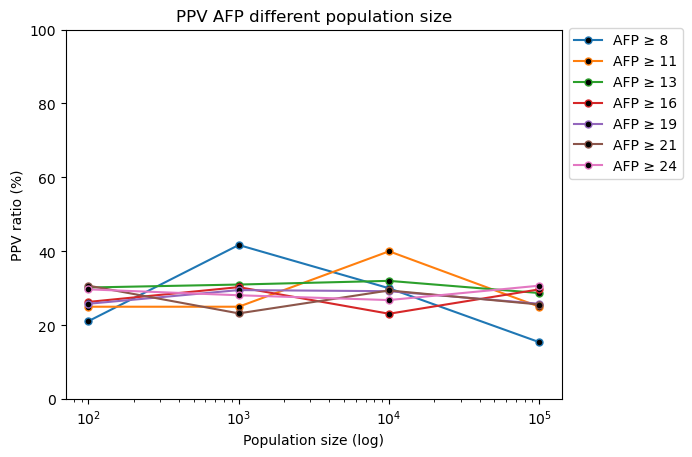

In [19]:
########################################################################################################################################################
# test how PPV change for AFP for different population size and stable prevalence (5%)
########################################################################################################################################################

# AFP, diff threshold - - Tab. 4 in paper
sensitivity = [0.86, 0.86, 0.59, 0.55, 0.45, 0.41, 0.41]
specificity = [0.85, 0.89, 0.91, 0.93, 0.94, 0.94, 0.95]

# PPV for different sample size
AFP_pop_PPV = []
for i in pop_list:
    for f, b in zip(sensitivity, specificity):
        fn, fp, PPV = get_universal_test_results(i, f, b)
        AFP_pop_PPV.append(PPV)

# split test to 4 (we test 4 population sizes)
split_set_pop = list()
set_size_pop = 4

for i in range(0, len(AFP_pop_PPV), set_size_pop):
    split_set_pop.append(AFP_pop_PPV[i:i+set_size_pop])
    
# plot PPV for AFP
for i in split_set_pop:
    plt.plot(patient_popul, i,marker='o', markersize=5, markerfacecolor = 'black')
    plt.title('PPV AFP different population size')
    plt.xlabel('Population size (log)')
    plt.ylabel('PPV ratio (%)')
    plt.xscale('log')
    plt.ylim([0, 100])
    plt.legend(['AFP ≥ 8', 'AFP ≥ 11', 'AFP ≥ 13','AFP ≥ 16','AFP ≥ 19', 'AFP ≥ 21','AFP ≥ 24'], loc='center left', bbox_to_anchor=(1, 0.8))

Increasing the population size does not affect the PPV ratio in general or differentiate which AFP level can achieve the best PPV ratio.

Testing for different prevalence is another analysis that can help us understand which AFP level has the biggest PPV ratio.

### Different prevalence

In [20]:
########################################################################################################################################################
# test effect of different prevalence with sample size of 602 people
########################################################################################################################################################

# I analyzed prevalence of 0.1, 1, 5, 10, 25 and 50 %
prevalence = [0.1, 1, 5, 10, 25, 50]

# data generating
popul = []
for i in prevalence:
        ss = pop_prev(patient_population, i)
        popul.append(ss)

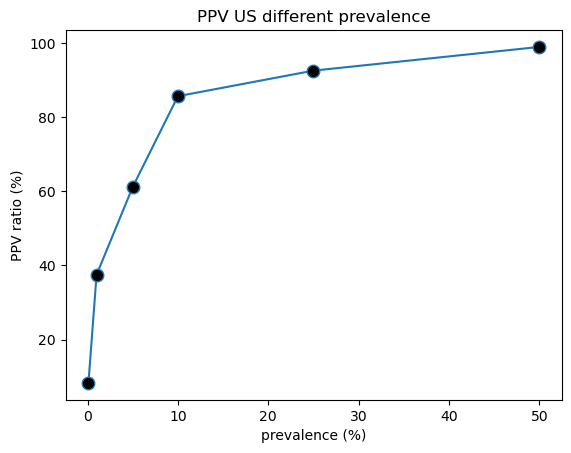

In [21]:
########################################################################################################################################################
# test effect of different prevalence with sample size of 602 people to PPV US
########################################################################################################################################################

# Ultrasound Surveillance - Tab. 4 in paper
sensitivity = 1
specificity = 0.98

# data generating
PPV_US = []
for i in popul:
    fn, fp, PPV =  get_universal_test_results(i, sensitivity, specificity)
    PPV_US.append(PPV)
    
# plot PPV for different prevalence
plt.plot(prevalence, PPV_US, marker='o', markersize=9, markerfacecolor = 'black')
plt.title('PPV US different prevalence')
plt.xlabel('prevalence (%)')
plt.ylabel('PPV ratio (%)')
plt.show()

The increasing prevalence of the disease increases the ratio of PPV in the prediction of HCC via US. The function have logaritmic shape with a knee of a curve in prevalence of 10%.

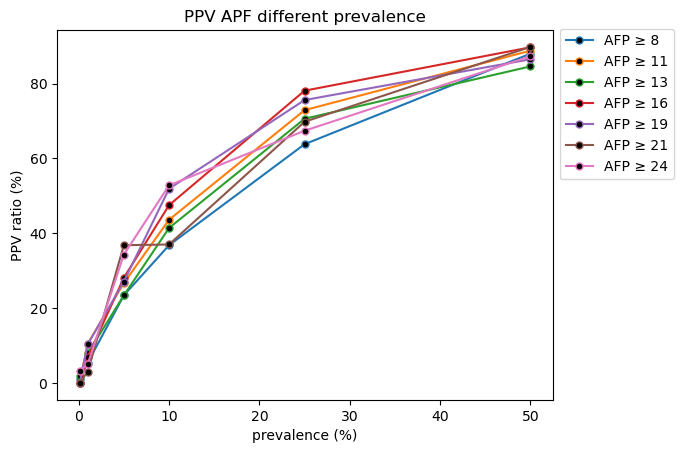

In [26]:
########################################################################################################################################################
# test effect of different prevalence with sample size of 602 people to PPV AFP
########################################################################################################################################################

# AFP, diff threshold  - Tab. 4 in paper
sensitivity = [0.86, 0.86, 0.59, 0.55, 0.45, 0.41, 0.41]
specificity = [0.85, 0.89, 0.91, 0.93, 0.94, 0.94, 0.95]

# data generating
PPV_AFP = []
for f, b in zip(sensitivity, specificity):
    for i in popul:
        fn, fp, PPV = get_universal_test_results(i, f, b)
        PPV_AFP.append(PPV)
        
# I analyze 6 different prevalence so split set according to this
split_set_pop2 = list()
set_size_pop2 = 6

for i in range(0, len(PPV_AFP), set_size_pop2):
    split_set_pop2.append(PPV_AFP[i:i+set_size_pop2])
    

    
for x in split_set_pop2:
    plt.plot(prevalence, x, marker='o', markersize=5, markerfacecolor = 'black')
    plt.title('PPV APF different prevalence')
    plt.xlabel('prevalence (%)')
    plt.ylabel('PPV ratio (%)')
    plt.legend(['AFP ≥ 8', 'AFP ≥ 11', 'AFP ≥ 13','AFP ≥ 16','AFP ≥ 19', 'AFP ≥ 21','AFP ≥ 24'], loc='center left', bbox_to_anchor=(1, 0.8))

As in the US, the PPV ratio increases with increasing patient prevalence.

In [27]:
########################################################################################################################################################
# Table representation of PPV AFP
########################################################################################################################################################

#df10 = pd.DataFrame(split_set_pop2, index=['0.1', '1', '5','10','25','50']).T
df10 = pd.DataFrame(split_set_pop2).T.rename(columns={0: 'AFP ≥ 8',1: 'AFP ≥ 11',2: 'AFP ≥ 13',3: 'AFP ≥ 16',4: 'AFP ≥ 19',5: 'AFP ≥ 21',6: 'AFP ≥ 24'}, 
                                             index={0: '0.1%',1: '1%',2: '5%',3: '10%',4: '25%',5: '50%'})
df10.style.highlight_max(color = 'lightgreen', axis = 1)

,AFP ≥ 8,AFP ≥ 11,AFP ≥ 13,AFP ≥ 16,AFP ≥ 19,AFP ≥ 21,AFP ≥ 24
0.1%,1.000000,0.000000,1.800000,0.000000,0.000000,0.000000,3.200000
1%,5.400000,10.500000,7.900000,6.900000,10.300000,3.000000,5.000000
5%,23.400000,26.700000,23.400000,28.100000,27.100000,36.800000,34.300000
10%,36.800000,43.600000,41.400000,47.500000,51.900000,37.000000,52.800000
25%,63.800000,72.900000,70.600000,78.100000,75.600000,69.800000,67.400000
50%,88.000000,88.800000,84.600000,89.700000,86.500000,89.800000,87.300000


In the table, green cells represent the largest PPV ratio for each prevalence level. We cannot say from this analysis which AFP level gives us the best PPV ratio.

# Conclusion

In the presented analysis, I focused on the potential problem of high FP ratios for HCC prediction by US and different AFP levels. I showed a stable PPV ratio for different patient population sizes for US and also for different AFP levels. The different AFP concentration threshold results also show the impossibility of distinguishing which concentration shows the best PPV ratio. For this reason, in the next analysis I focused on the change in the prevalence of diseases in the population of 603 people. In both US and AFP, the PPV ratio increases with increasing prevalence. I consider this to be a trivial result, but again this analysis does not provide evidence as to which AFP concentration threshold is best for solving the high FP ratio problem. It is important to say that there is inconsistency in the result of which AFP level shows the best results with iterations of the experiment. In conclusion, we can say that the measurement of AFP shows a high ratio of FP and this ratio does not decrease with a higher threshold of AFP concentration. Increasing prevalence has the potential to solve this problem. Thus, AFP measurements are not good as a proxy for HCC detection, but may have the potential to detect HCC as a second or additional test (eg, after US) after an increase in prevalence. From this analysis, 10% appears to be a reasonable best prevalence cutoff for predicting HCC in the US.

# Methods

The information source in this report comes from the published study WC Kao et. al and 2001 [1]

In the report, I evaluate following several metrics prediction: 
True positives (TP) are actual positives which are correctly classified [2].
False positives (FP) are actual positives which are incorrectly classified [3].
True negatives (TN) samples correctly classified as negative [2]
False negatives (FN) samples incorrectly classified as negative [2]
Positive Predictive Value (PPV) the proportion of predicted positives which are actual positives [4] Formula for calculation the PPV is:
PPV = TP/TP+FP

The next feature which is important to evaluate real impact and prediction potential is patient prevalence. Prevalence can be defined as: The proportion of patients in the whole study population who have the target condition, usually expressed as a percentage of the population [5]. Formula for calculation of prevalence is: 
prevalence = (Total number with disease) / (Population at risk for the disease)

In the report I used following python libraries. For calculations I used pandas, numpy, random, math and for matplotlib for visualizations. The whole code is written in JupyterLab 3.4.4.

## REF

1. TONG, Myron J.; BLATT, Lawrence M.; KAO, Vincent WC. Surveillance for hepatocellular carcinoma in patients with chronic viral hepatitis in the United States of America. Journal of gastroenterology and hepatology, 2001, 16.5: 553-559. https://doi.org/10.1046/j.1440-1746.2001.02470.x
2. Wang, H., Zheng, H. (2013). True Positive Rate. In: Dubitzky, W., Wolkenhauer, O., Cho, KH., Yokota, H. (eds) Encyclopedia of Systems Biology. Springer, New York, NY. https://doi.org/10.1007/978-1-4419-9863-7_255
3. Wang, H., Zheng, H. (2013). False Positive Rate. In: Dubitzky, W., Wolkenhauer, O., Cho, KH., Yokota, H. (eds) Encyclopedia of Systems Biology. Springer, New York, NY. https://doi.org/10.1007/978-1-4419-9863-7_224
4. Wang, H., Zheng, H. (2013). Positive Predictive Value. In: Dubitzky, W., Wolkenhauer, O., Cho, KH., Yokota, H. (eds) Encyclopedia of Systems Biology. Springer, New York, NY. https://doi.org/10.1007/978-1-4419-9863-7_256
5. WHITING, Penny F., et al. How well do health professionals interpret diagnostic information? A systematic review. BMJ open, 2015, 5.7: e008155.